<h2>INTEGRAL Observations of Classical Novae</h2>

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

<h3>Reading in our catalogue file:</h3>

In [4]:
data_frame = pd.read_csv('INTEGRAL_novae_wTimes.csv')

In [5]:
data_frame

Unnamed: 0  Unnamed: 0.1   ID       Name    Other Name  Ra\r\n(deg)  \
0             0             0  225  V3890 Sgr    N Sgr 1962      277.680   
1             1             1   54   V394 CrA    N CrA 1949      270.108   
2             2             2  172   V745 Sco           NaN      268.842   
3             3             3  101     IM Nor    N Nor 1920      234.861   
4             4             4    3     CI Aql           NaN      283.015   
..          ...           ...  ...        ...           ...          ...   
149         149           149  114  V2540 Oph    N Oph 2002      264.393   
150         150           150  246  V4741 Sgr  N Sgr 2002/1      269.999   
151         151           151  247  V4742 Sgr  N Sgr 2002/2      270.591   
152         152           152  248  V4743 Sgr  N Sgr 2002/3      285.289   
153         153           153  351     IM Nor    N Nor 1920      234.861   

     Dec\r\n(deg)  l\r\n(deg)  b\r\n(deg)  Outburst\r\nYear  ...  \
0         -24.019       9.204      -6.443        1962, 1990  ...   
1         -39.010     352.822      -7.723        1949, 1987  ...   
2         -33.250     357.358      -3.999        1937, 1989  ...   
3         -52.322     327.098       2.485        1920, 2002  ...   
4          -1.477      31.688      -0.812  1917, 1941, 2000  ...   
..            ...         ...         ...               ...  ...   
149       -16.388       9.750       8.152              2002  ...   
150       -30.889     359.899      -3.675              2002  ...   
151       -25.342       4.986      -1.390              2002  ...   
152       -22.002      14.124     -11.877              2002  ...   
153       -52.322     327.098       2.485              2002  ...   

    E(B-V)\r\n(mag) E(B-V) Err. (mag) _r\r\n(arcsec)  mode dist\r\n(pc)  \
0     0.900 ± 0.300               NaN          0.092             4218.0   
1           : 0.200               NaN          0.908             3225.0   
2     1.000 ± 0.200               NaN          0.107                NaN   
3     0.800 ± 0.200               NaN          0.113             1311.7   
4     0.920 ± 0.220               NaN          0.166             3061.8   
..              ...               ...            ...                ...   
149             NaN               NaN          0.814                NaN   
150             NaN               NaN            NaN                NaN   
151             NaN               NaN          0.125                NaN   
152           0.250               NaN          0.610             3813.3   
153   0.800 ± 0.200               NaN          0.113             1311.7   

     median dist\r\n(pc) infimum\r\n(pc) supremum\r\n(pc)     Name.1  \
0                 4880.5          3024.1           8722.3  V3890 Sgr   
1                 4131.6          1973.9           8709.5   V394 CrA   
2                    NaN             NaN              NaN   V745 Sco   
3                 2290.2           907.6           6533.6     IM Nor   
4                 3227.9          2532.3           4470.4     CI Aql   
..                   ...             ...              ...        ...   
149                  NaN             NaN              NaN  V2540 Oph   
150                  NaN             NaN              NaN  V4741 Sgr   
151                  NaN             NaN              NaN  V4742 Sgr   
152               4462.2          2736.9           8170.3  V4743 Sgr   
153               2290.2           907.6           6533.6     IM Nor   

              MJD         IJD  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
..            ...         ...  
149  52298.800000  754.800000  
150  52379.354005  835.354005  
151  52532.110000  988.110000  
152  52537.430995  993.430995  
153  52277.300000  733.300000  

[154 rows x 30 columns]

In [7]:
dist = data_frame['Dist. \n(kpc)'] # creating an array with nova distances

KeyError: 'Dist. \n(kpc)'

(0, 30)

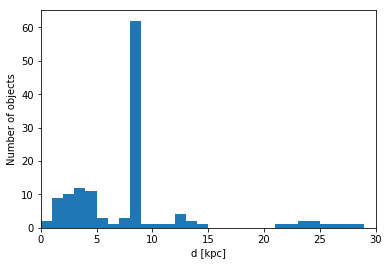

In [6]:
plt.hist(dist,bins=np.arange(0,51,1))
plt.xlabel('d [kpc]')
plt.ylabel('Number of objects')
plt.xlim(0,30)

In [7]:
dist_err = data_frame['Dist. Err. (kpc)']

<h3>Defining indices which novae are chosen</h3>

In [8]:
data_frame['Var. type']

0           NR
1           NR
2           NR
3           NR
4           NR
5           NR
6           NR
7           NR
8           NR
9           NR
10         NAa
11         NAa
12         NAa
13         NAa
14          UG
15         NAa
16         NAa
17         NAa
18         NAa
19         NAa
20           N
21         NAa
22         NAa
23         NAa
24         NAa
25           N
26           N
27          NB
28           N
29           N
        ...   
124          N
125          N
126         NL
127          N
128        NAa
129          N
130          N
131        NAa
132          N
133          N
134          N
135        NAa
136         NC
137          N
138          N
139          N
140          N
141          N
142        NAa
143         NC
144          N
145      NB/DQ
146          N
147          N
148    V838MON
149         NB
150          N
151        NAa
152        NAa
153         NR
Name: Var. type, Length: 154, dtype: object

In [9]:
good_novae = np.where(~np.isnan(data_frame['IJD']) & # no recurrent ones
                      (data_frame['Dist. \n(kpc)']+data_frame['Dist. Err. (kpc)'] < 25) & # inside Milky Way
                        ((data_frame['Var. type'] == 'N') | # different classical nova types
                         (data_frame['Var. type'] == 'NAa') | 
                         (data_frame['Var. type'] == 'NB') |
                         (data_frame['Var. type'] == 'NC') |
                         (data_frame['Var. type'] == 'NTS')))[0]

In [10]:
good_novae # all indices

array([ 10,  11,  12,  13,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  33,  34,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  56,  57,  59,  60,  61,  62,  63,  64,  65,  69,  71,
        72,  73,  75,  76,  77,  80,  81,  82,  83,  84,  85,  88,  93,
        94,  97,  98,  99, 100, 101, 102, 103, 104, 105, 109, 110, 111,
       112, 114, 116, 117, 119, 120, 121, 124, 125, 127, 129, 131, 134,
       135, 137, 138, 139, 141, 142, 144, 146, 147, 149, 152])

In [11]:
len(good_novae) # number of novae

102

<h3>Expectations:</h3>

In [12]:
print(1*u.pc.to(u.AU)) # conversion of 1 pc to astronomical units
print(1*u.pc.to(u.cm)) # conversion of 1 pc to cm

206264.80624548031
3.0856775814671913e+18


In [13]:
Mej22 = 3e-9*u.Msun # ejected mass of 22Na
Mej07 = 1e-9*u.Msun # ejected mass of 7Be
p22 = 0.9994        # probability of gamma-ray emission at 1.275 MeV
p07 = 0.1052        # probability of gamma-ray emission at 0.478 MeV
m22 = 21.994437*u.u # atomic mass of 22Na
tau22 = 3.753*u.yr  # characteristic lifetime of 22Na (halflife / ln2)
m07 = 7.016929*u.u  # atomic mass of 7Be
tau07 = 76.66*u.d   # characteristic lifetime of 7Be

In [14]:
L022 = Mej22*p22/(m22*tau22) # canonical (intrinsic) luminosity of 22Na gamma-rays
L007 = Mej07*p07/(m07*tau07) # ... of 7Be gamma-rays

In [15]:
L022 # not very useful units, so we convert

<Quantity 3.63219525e-11 solMass / (u yr)>

In [16]:
L022.to(u.s**(-1)) # this is in units of number (photons) per seconds

<Quantity 1.37827651e+39 1 / s>

<h3>Definition of exponential decay functions, either including mass, distance, times, probabilities for decay etc (top), or only normalisation (bottom)</h3>

In [17]:
def exp_decay_flux_hard(t,T0,M,d,m,tau,p):
    """ returns flux as a function of time from a radioactive source (m,tau,p) of mass M at distance d
     T0 in d        occurrence time 
     M in 1e-9 Msun ejecta mass
     m in u         nuclei mass
     tau in d       decay time (T05/ln(2))
     t in d         time variable
     d in kpc       distance to object
     normalisation (u.Msun/(u.u*u.d*u.kpc**2)).to(1/u.s/u.cm**2) = 1455647780.4139435
    """
    N = 1.4556477804139435
    return N*M*p/(m*tau*4*np.pi*d**2)*np.exp(-(t-T0)/tau)*np.heaviside(t-T0,1)

In [18]:
def exp_decay_hard(t,T0,tau):
    """ returns exponential decay law normalised to one for given decay time
     T0 in d        occurrence time 
     tau in d       decay time (T05/ln(2))
     t in d         time variable
    """
    N = 1.0
    return N*np.exp(-(t-T0)/tau)*np.heaviside(t-T0,1)

<h3>Example of nearby and 'old' (in terms of INTEGRAL observations) nova: index 100</h3>

In [19]:
idx = 100
print('Object name:                             ',data_frame['Name'][good_novae[idx]])
print('Outburst date:                           ',data_frame['Date (YYYY/MM/DD.DDDD)'][good_novae[idx]])
#print('Outburst date in INTEGRAL Julian Days (IJD)')
print('Outburst IJD:                            ',data_frame['IJD'][good_novae[idx]])
print('Outburst MJD:                            ',data_frame['MJD'][good_novae[idx]])
print('Object coordinates (l/b):                ',data_frame['l\n(deg)'][good_novae[idx]],data_frame['b\n(deg)'][good_novae[idx]])
print('Object distance (and uncertainty) [kpc]: ',data_frame['Dist. \n(kpc)'][good_novae[idx]],data_frame['Dist. Err. (kpc)'][good_novae[idx]])

Object name:                              V2540 Oph
Outburst date:                            2002 01 24.8
Outburst IJD:                             754.8000000000029
Outburst MJD:                             52298.8
Object coordinates (l/b):                 9.75 8.152000000000001
Object distance (and uncertainty) [kpc]:  9.88 4.771


<h3>Extracting the positions (galactic coordinates l and b) for our chosen objects (indexed by g00d_novae)</h3>

In [20]:
lon = data_frame['l\n(deg)'].values[good_novae]
lat = data_frame['b\n(deg)'].values[good_novae]

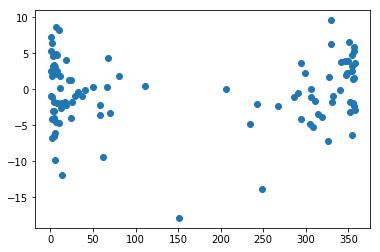

In [21]:
plt.plot(lon,lat,'o') # where are they?

<h3>Galactic coordiantes can either run from l=-180 to l=+180, or from l=0 to l=360. While in any case, l=0 is the galactic centre. For a nicer plot, centred at the centre, we just shift the coordinates by 360.</h3>

In [22]:
lon[lon > 180] -= 360

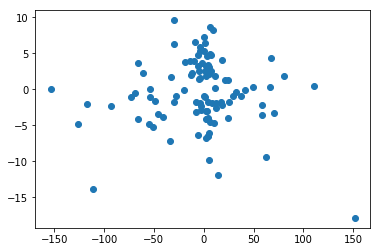

In [23]:
plt.plot(lon,lat,'o')

<h3>If we want to have a projection of this plot above to a sphere (for example Aitoff projection), we need to convert the angles to radians:</h3>

In [24]:
lon_rad = np.deg2rad(lon)
lat_rad = np.deg2rad(lat)

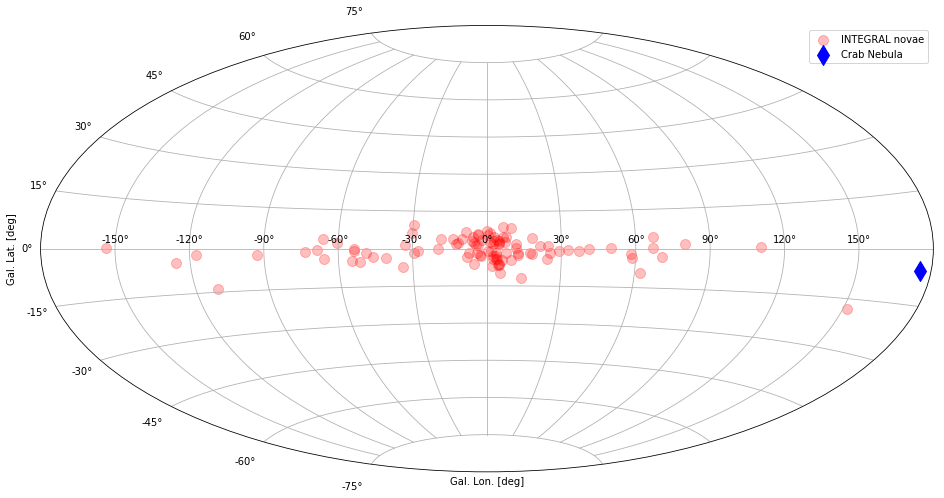

In [25]:
plt.figure(figsize=(16,10))
plt.subplot(111,projection='aitoff')
plt.scatter(lon_rad,lat_rad,marker='o',s=100,alpha=0.25,c='red',label='INTEGRAL novae')
plt.grid(True)
plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')

# SIMBAD coordinates of the Crab: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Crab+Nebula
crab_lon = 184.55745
crab_lat = -05.78436

crab_lon_rad = np.deg2rad(360-crab_lon)
crab_lat_rad = np.deg2rad(crab_lat)

plt.scatter(crab_lon_rad,crab_lat_rad,marker='d',s=200,c='blue',label='Crab Nebula')

plt.legend()

<h3>This nicely shows where our good objects are: mainly at or around the direction(!) of the galatic centre, and a few along the galactic disk (b=0). For comparison, the strongest gamma-ray source in the sky (the Crab nebula) is shown in blue.</h3>

<h2>In what follows, we will do parts of a principled analysis:<br>
    1) Calculate a perfect model expectation in physical units (here: flux in units of ph/cm^2/s)<br>
    2) Transform this model into the data space of the instrument (here: counts)<br>
    3) Use the data generating process (here: Poisson distribution), and simulate a mock data set<br>
    4) Fit the mock data set with the model used to create it<br>
    5) Check if the input and output values are consistent</h2>

<h3>Gamma-ray light curve (=model) of a perfect instrument with omni-directional response</h3>

In [26]:
tt = np.arange(0,7000,1) # array of times in units of IJD
# (INTEGRAL Julian Day: IJD=0 is 32 seconds before the 1st of January 2000)

name0 = data_frame['Name'].values[good_novae[idx]]
d0 = dist.values[good_novae[idx]]*u.kpc # distance to nova (in units of kpc)
T00 = data_frame['IJD'].values[good_novae[idx]] # explosion date
tau_d = tau22.to(u.d).value # conversion of the lifetime in days

F_norm = L022 / (4*np.pi*d0**2) # calculation of maximum flux (i.e. at t = T0)
# note that L022 is SET to a certain value which we decided in the first place
# our goal will be to find out what L022 (and Mej22) actually is

F_norm = F_norm.to(1/(u.cm**2*u.s)).value # conversion to useful flux units (ph/cm2/s) and only return the value

flux = F_norm*exp_decay_hard(tt,T00,tau_d) # calculation of the light curve

<h3>Plot our expectation in 'model space', i.e. with physical units</h3>

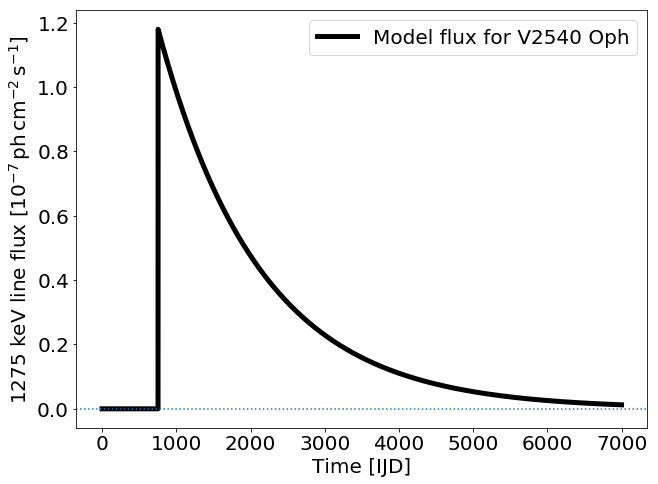

In [27]:
plt.figure(figsize=(10.24,7.68))
plt.plot(tt,flux*1e7,label='Model flux for '+name0,color='black',linewidth=5)
plt.xlabel('Time [IJD]',fontsize=20)
plt.ylabel(r'1275 keV line flux [$10^{-7}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':')
plt.legend(fontsize=20)

<h3>Now, what can we expect to measure in our unrealistically perfect instrument?</h3>

<h3>The 'response' of our perfect instrument is now just assumed to be constant:<br>
    That means we set an observation time in each day to the full day (in seconds), and assume a collecting area ('effective area') to have something to calculate:</h3>

In [28]:
T_exp = 86400. # seconds per day (= one time bin)
A_eff = 10. # fake collecting area of ouf perfect instrument (in cm^2)

<h3>The rate (actually fractional number of counts expected per unit time) is then:</h3>

In [29]:
model_counts = flux * T_exp * A_eff # expected number of counts per time bin

<h3>Plot in count space for the model:</h3>

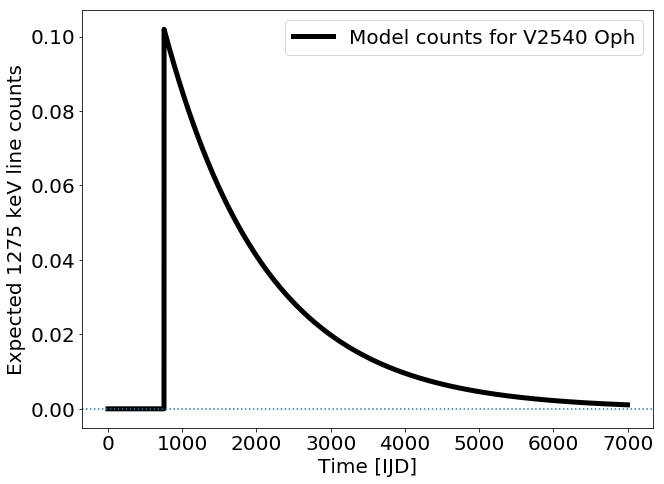

In [30]:
plt.figure(figsize=(10.24,7.68))
plt.plot(tt,model_counts,label='Model counts for '+name0,color='black',linewidth=5)
plt.xlabel('Time [IJD]',fontsize=20)
plt.ylabel(r'Expected 1275 keV line counts',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':')
plt.legend(fontsize=20)

<h3>Since we cannot measure 0.1 photons, we draw a random sample according to our data generating process, which is the Poisson distribution (= counting per interval)<br>
    Note that this is not necessarily photons and not necessarily time</h3>

In [31]:
np.random.seed(1234)
count_data = np.random.poisson(model_counts) # this produces one random sample from our model
# the seed=1234 tells the function to always produce the same random sample

<h3>Now plot in count space (data space) of our instrument</h3>

<Figure size 1152x720 with 0 Axes>

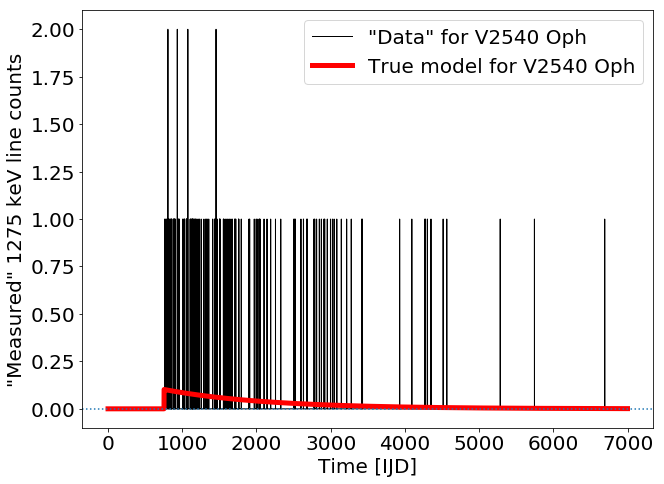

In [32]:
plt.figure(figsize=(16,10))

plt.figure(figsize=(10.24,7.68))
plt.step(tt,count_data,label='"Data" for '+name0,color='black',linewidth=1)
plt.plot(tt,model_counts,label='True model for '+name0,color='red',linewidth=5) # same as above
plt.xlabel('Time [IJD]',fontsize=20)
plt.ylabel(r'"Measured" 1275 keV line counts',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':')
plt.legend(fontsize=20)

<h3>Each spike is either 0, 1, or 2 photons that our fake instrument measured<br>
    This is a "simulation" of data, i.e. one particular realisation of what could have been measured, given our model that we put in</h3>

<h3>Note that this is NOT noisy, but a perfect data set since we only measure what our source (the nova) would look like. Any background will be dealt with later.</h3>

<h3>Now that we have data and a parametrised model, we can fit this again, and check if we can get back what we put in<br>
    This might sound redundant as we already know the answer, but provides a consolidation of our data generation and the applied inference method (finding a maximum of the Poisson likelihood). It is the start of a principled data analysis and is required to work, as otherwise, we can never be sure what we would infer from 'real' measurements</h3>

<h3>Here definition of the likelihood function: this includes the logarithm Poisson likelihood (also sometimes referred to as the 'Cash-statistics' (Cash 1979)), and the model, which is an exponential decay function, applied to the 'response', which here are only the two constants T_exp and A_eff.</h3>"

In [33]:
# Definition of the logarithm of the Poisson likelihood for our model in which we are interested in only the flux
def lnlike(theta, t, data, T0, tau): # the unknown (to-be-fitted) parameters have to be the first argument
    # this is because of the way the following programs are reading this likelihood function
    
    f = theta # parametes to be fitted
    
    model = f * exp_decay_hard(t,T0,tau) * T_exp * A_eff # our model in count space(!), i.e. expected number
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

<h3>Suppose we don't know how to minimise this function, we do a 'brute-force' analysis, and just calculate a lot of likelihood values for a given range. In this way, however, we cannot be sure if we found the absolute maximum.</h3>

In [34]:
f_arr = np.arange(1e-9,2e-7,1e-9) # array to calculate likelihood values for

<h3>Running a for-loop over the values in f_arrm, and save into a pre-defined array loglik_arr with the same length as f_arr:</h3>

In [35]:
len_f = len(f_arr)
loglik_arr = np.zeros(len_f)
for i in range(len_f):
    loglik_arr[i] = lnlike(f_arr[i],tt,count_data,T00,tau_d)

Delta_loglik = -loglik_arr-np.min(-loglik_arr)

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


Text(0, 0.5, '$2\\mathscr{L}$')

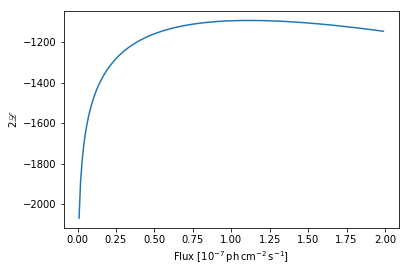

In [36]:
plt.plot(f_arr*1e7,loglik_arr) # for the purpose of plotting, I multiplied the 
# flux by a common factor 1e7 and make this clear in the label of the x-axis
plt.xlabel(r'Flux [$10^{-7}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]')
plt.ylabel(r'$2\mathscr{L}$')

<h3>Apparently, we found a maximum somewhere, we look it up in the array:</h3>

In [37]:
f_arr[np.argmax(loglik_arr)],F_norm
# the first value is the one we found from looping values and calculating the likelihood
# the second value is the true one that we put in to define our model

(1.12e-07, 1.180080164266053e-07)

<h3>Are these values consistent? We need to figure out the uncertainties:<br>
    This is done by checking where the likelihood changed by 0.5 units:</h3>

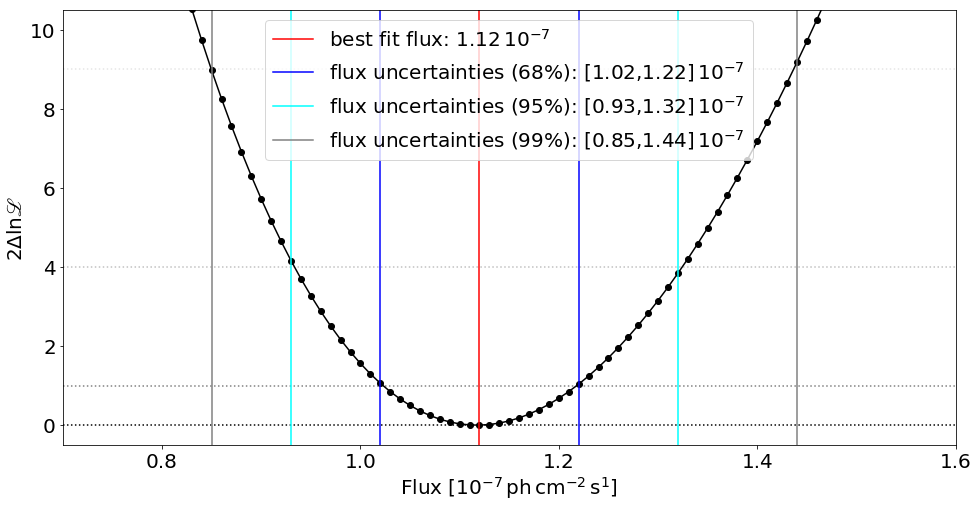

In [38]:
plt.figure(figsize=(16,8))
plt.plot(f_arr*1e7,Delta_loglik,'ko-')
plt.xlim(0.7,1.6)
plt.ylim(-0.5,10.5)
plt.xlabel(r'Flux [$10^{-7}\,\mathrm{ph\,cm^{-2}\,s^{1}}$]',fontsize=20)
plt.ylabel(r'$2\Delta\mathrm{\ln\mathscr{L}}$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':',color='black')
plt.axhline(1,linestyle=':',color='black',alpha=0.5)
plt.axhline(4,linestyle=':',color='black',alpha=0.25)
plt.axhline(9,linestyle=':',color='black',alpha=0.1)

f_bestfit = f_arr[np.where(Delta_loglik ==0)[0]] # minimum defines best fit
# because we can never find in our grid of tested values where 2Delta(logL)=1, we estimate this by bracketing
# this is not a very good style, and should never be done, but helps to understand what is going on
f_1sigma_plusmin = f_arr[np.where((Delta_loglik > 0.9) & (Delta_loglik < 1.1))[0]]
# 2Delta_lnlike = 1 defines the 68.3% uncertainties
f_2sigma_plusmin = f_arr[np.where((Delta_loglik > 3.8) & (Delta_loglik < 4.2))[0]]
# 2Delta_lnlike = 4 defines the 95.4% uncertainties
f_3sigma_plusmin = f_arr[np.where((Delta_loglik > 8.8) & (Delta_loglik < 9.2))[0]]
# 2Delta_lnlike = 9 defines the 99.7% uncertainties

plt.axvline(f_bestfit*1e7,color='red',
            label=r'best fit flux: '+str('%3.2f' % (f_bestfit*1e7))+'$\,10^{-7}$')

plt.axvline(f_1sigma_plusmin[0]*1e7,color='blue',
            label=r'flux uncertainties (68%): '+str('[%3.2f,%3.2f]' % (f_1sigma_plusmin[0]*1e7,f_1sigma_plusmin[1]*1e7))+'$\,10^{-7}$')
plt.axvline(f_1sigma_plusmin[1]*1e7,color='blue')

plt.axvline(f_2sigma_plusmin[0]*1e7,color='cyan',
            label=r'flux uncertainties (95%): '+str('[%3.2f,%3.2f]' % (f_2sigma_plusmin[0]*1e7,f_2sigma_plusmin[1]*1e7))+'$\,10^{-7}$')
plt.axvline(f_2sigma_plusmin[1]*1e7,color='cyan')

plt.axvline(f_3sigma_plusmin[0]*1e7,color='gray',
            label=r'flux uncertainties (99%): '+str('[%3.2f,%3.2f]' % (f_3sigma_plusmin[0]*1e7,f_3sigma_plusmin[1]*1e7))+'$\,10^{-7}$')
plt.axvline(f_3sigma_plusmin[1]*1e7,color='gray')


plt.legend(fontsize=20)

<h3>Now, are the values from before consistent?<br>
    Within 1sigma (1.02,1.22) vs. 1.18 they apparently are.<br>
    Note that one can already see here that the Gaussian approximation that is typically done (cf. chi2 fitting) would already break down around 3sigma as the distribution gets more and more asymemtric (see also examples below).</h3>

<h3>Probability distribution function for the flux as calculated from looping over a grid of flux values (f_arr)</h3>

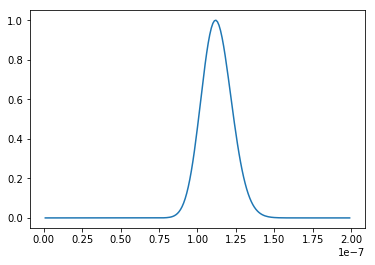

In [39]:
plt.plot(f_arr,np.exp(-0.5*Delta_loglik)) # note the asymmetry

<h3>Now we want to fit this mock data. Here, we use the emcee package, because it can just read in the function to minimise and return the desired distributions:</h3>

In [40]:
import emcee
import pickle
import scipy.optimize as op
import corner
from tqdm import tqdm_notebook as tqdm

<h3>Here, I define several more models to not just fit the amplitude (flux normalisation), but also check on how good the data can actually estimate the other parameters (explosion time and decay time) that may or may not be known in the first place:</h3>

In [41]:
# Model with flux normalisation and explosion time unknown
def lnlike2(theta, t, data, tau): # the unknown (to-be-fitted) parameters have to be the first argument
    # this is because of the way the following programs are reading this likelihood function
    
    f, T0 = theta # parametes to be fitted
    
    model = f * exp_decay_hard(t,T0,tau) * T_exp * A_eff # our model in count space(!), i.e. expected number
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

In [42]:
# Model with flux normalisation and decay time unknown
def lnlike2a(theta, t, data, T0): # the unknown (to-be-fitted) parameters have to be the first argument
    # this is because of the way the following programs are reading this likelihood function
    
    f, tau = theta # parametes to be fitted
    
    model = f * exp_decay_hard(t,T0,tau) * T_exp * A_eff # our model in count space(!), i.e. expected number
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

In [43]:
# Model with all three parameters unknown
def lnlike3(theta, t, data): # the unknown (to-be-fitted) parameters have to be the first argument
    # this is because of the way the following programs are reading this likelihood function
    
    f, T0, tau = theta # parametes to be fitted
    
    model = f * exp_decay_hard(t,T0,tau) * T_exp * A_eff # our model in count space(!), i.e. expected number
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

<h3>Here, I set up a first fit, using all the data, and see what's the result:</h3>

In [44]:
choose = np.arange(0,7000,1) # this is an index array, for us to choose what data we actually want to fit
# if it runs from 0 to 6999 in steps of 1, we use all data.
# if we used np.arange(0,7000,10) we would only use every tenth data point

ndim, nwalkers = 1, 10 # define the dimensionality of the problem (1 fit parameter),
# and the number of chains (or walkers, TWD!) for the sampler to run

# the pos array defines the initial guess for the walkers
# typically, for a 1D problem, the starting points are not very sensitive for the later result
# for higher Ds, this can be a problem, however, if the priors (not yet included here) are badly set
pos = [np.array([1e-7]) + 1e-8*np.random.rand(ndim) for i in range(nwalkers)]

# set up the sampler object with our data (tt[choose], count_data[choose])
# and some additional, fixed, values
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(tt[choose], count_data[choose], T00, tau_d))

# reset the sampler if used before
sampler.reset()

#run the sampler with 2000 iterations for the 10 walkers
pos, prob, state  = sampler.run_mcmc(pos, 2000, progress=True)



/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
100%|██████████| 2000/2000 [00:05<00:00, 374.25it/s]


<h3>Now we extract the result:</h3>

In [45]:
samples = sampler.get_chain() # extract the 2000 sampled values for each chain
samplesf = sampler.flatchain  # flatten that array to only have a 1D array with 20000 values
# instead of 2D array with 2000 times 10 values, like the samples array
samples.shape

(2000, 10, 1)

In [46]:
samplesf.shape

(20000, 1)

In [47]:
ndim # dimensionality

1

<h3>Now we check out how this fit performed, i.e. the chains as a function of iteration, individually (coloured):</h3>

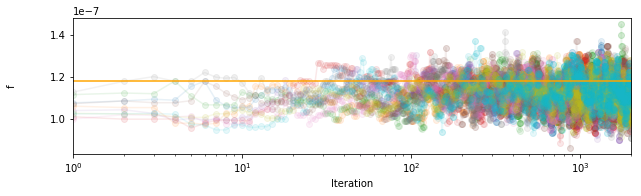

In [48]:
fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True) # set up a plotting scheme
labels = ["f"]      # labels for our parameters to plot
truths = [F_norm]   # what is the actually value that we put in the model
for i in range(ndim):    # he we would loop over all parameters to get an overview
    if ndim == 1:        # since we might have only one dimension, we need some eceptions
        ax = axes
        ax.set_xlabel("Iteration");
    else:
        ax = axes[i]
        axes[-1].set_xlabel("Iteration");
    ax.plot(np.arange(len(samples)),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, len(samples))
    ax.plot([1,len(samples)],[truths[i],truths[i]],color='orange') # true value in orange
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')

<h3> looks like it quickly converged (it actually never converges, but more about that maybe later).<br>
    However, many times, the sampler is looking for the minimum first, and then explores the region. This is often called a 'burn-in' phase, and has to be discarded for the final distribution.<br>
    Suppose we find that only after iteration 1000, the fit converged, we have to discard the first 1000 samples for ALL chains:</h3>

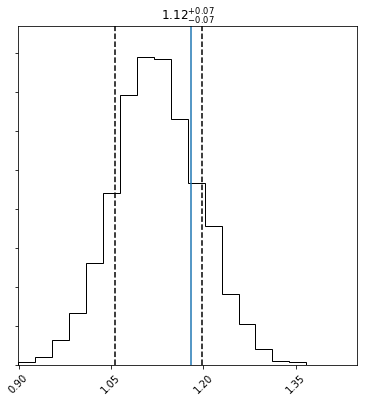

In [49]:
#let's plot the results
burnin = 1000
fig = corner.corner(samplesf[burnin*nwalkers:,:]*1e7, quantiles=[0.16,0.84],show_titles=True)
# here we just plot the samples after the 1000th value and discard the first ones due to burn in
# the corner routine plots the 1 and 2D histograms of the distributions that we sampled
# (cf. margenalised probability distributions in more than 1D below)
plt.axvline(F_norm*1e7) # true value
fig.set_size_inches(8,8)

<h3>We see that the true value is again in the 68% percentile (dashed lines), good.</h3>

<h3>How does our fit look like?<br>
For this we evaluate our model according to the samples values:</h3?

In [50]:
t_model = np.arange(0,7000,10) # define model times to plot (here only every tenth time bin for illustration)

y_models = np.zeros((len(t_model),samplesf.shape[0])) # define a 2D array with dimensions n_times x n_samples 

# fill the y_models array and calculate the model for each sample
for i in range(samplesf.shape[0]):
    y_models[:,i] = samplesf[i,0]*exp_decay_hard(t_model,T00,tau_d) * T_exp * A_eff

<h3>And plot the result (note that we need to discard the first 1000 values of each chain again):</h3>

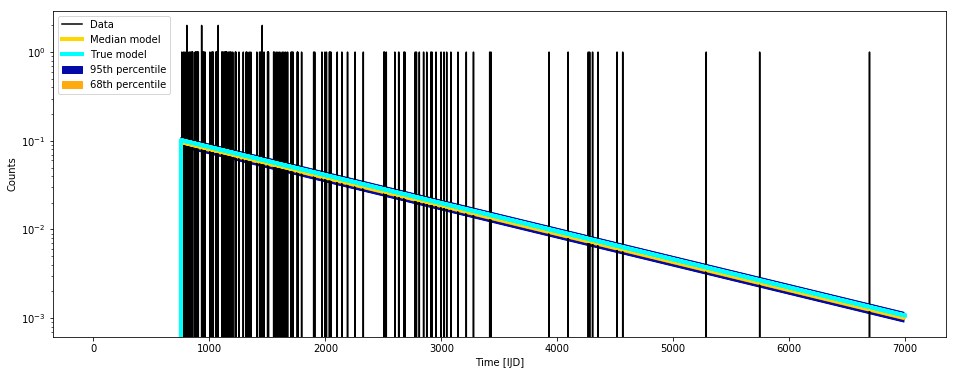

In [51]:
plt.figure(figsize=(16,6))

plt.step(tt[choose],count_data[choose],color='black',label='Data') # data 

# 2sigma band
level = 95.4
plt.fill_between(t_model,
                np.percentile(y_models[:,burnin*nwalkers:], 50 - 0.5*level, axis=1 ),
                np.percentile(y_models[:,burnin*nwalkers:], 50 + 0.5*level, axis=1 ),
                color='xkcd:cobalt blue',alpha=1.0,step='mid',label='95th percentile')

# 1sigma band
level = 68.3
plt.fill_between(t_model,
                np.percentile(y_models[:,burnin*nwalkers:], 50 - 0.5*level, axis=1 ),
                np.percentile(y_models[:,burnin*nwalkers:], 50 + 0.5*level, axis=1 ),
                color='xkcd:yellowish orange',alpha=1,step='mid',label='68th percentile')

# median model
fit_model = np.median(y_models[:,burnin*nwalkers:],axis=1)
plt.step(t_model,fit_model,linewidth=4,color='gold',where='mid',label='Median model')

plt.xlabel('Time [IJD]')
plt.ylabel('Counts')

plt.yscale('log')
plt.step(tt,flux*T_exp*A_eff,color='cyan',linewidth=4,where='mid',label='True model')

plt.title('')
plt.legend()

<h3>Looks like a pretty decent fit.<br>
    What happens if we remove some data?</h3>

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
100%|██████████| 2000/2000 [00:02<00:00, 936.88it/s]


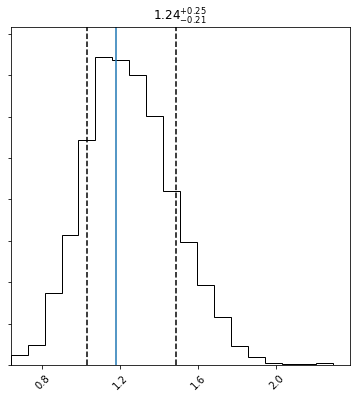

In [52]:
choose = np.arange(0,7000,10) # note the steps of 10 now
ndim, nwalkers = 1, 10 
pos = [np.array([1e-7]) + 1e-8*np.random.rand(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(tt[choose], count_data[choose], T00, tau_d))
sampler.reset()
pos, prob, state  = sampler.run_mcmc(pos, 2000, progress=True)

samples = sampler.get_chain() # extract the 2000 sampled values for each chain
samplesf = sampler.flatchain  # flatten that array to only have a 1D array with 20000 values
# instead of 2D array with 2000 times 10 values, like the samples array
samples.shape

#let's plot the results
burnin = 1000
fig = corner.corner(samplesf[burnin*nwalkers:,:]*1e7, quantiles=[0.16,0.84],show_titles=True)
# here we just plot the samples after the 1000th value and discard the first ones due to burn in
# the corner routine plots the 1 and 2D histograms of the distributions that we sampled
# (cf. margenalised probability distributions in more than 1D below)
plt.axvline(F_norm*1e7) # true value
fig.set_size_inches(8,8)

<h3>As expected, the uncertainties are increased, but NOT by the same amount of data that we threw away! This is related to the fact that also zero counts are important information in Poisson distributed data sets!</h3>

In [53]:
t_model = np.arange(0,7000,10) # define model times to plot (here only every tenth time bin for illustration)

y_models = np.zeros((len(t_model),samplesf.shape[0])) # define a 2D array with dimensions n_times x n_samples 

# fill the y_models array and calculate the model for each sample
for i in range(samplesf.shape[0]):
    y_models[:,i] = samplesf[i,0]*exp_decay_hard(t_model,T00,tau_d) * T_exp * A_eff

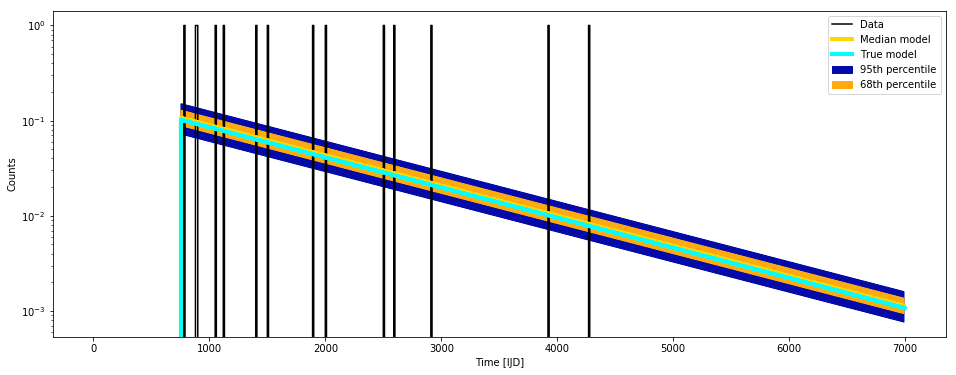

In [54]:
plt.figure(figsize=(16,6))

plt.step(tt[choose],count_data[choose],color='black',label='Data') # data 

# 2sigma band
level = 95.4
plt.fill_between(t_model,
                np.percentile(y_models[:,burnin*nwalkers:], 50 - 0.5*level, axis=1 ),
                np.percentile(y_models[:,burnin*nwalkers:], 50 + 0.5*level, axis=1 ),
                color='xkcd:cobalt blue',alpha=1.0,step='mid',label='95th percentile')

# 1sigma band
level = 68.3
plt.fill_between(t_model,
                np.percentile(y_models[:,burnin*nwalkers:], 50 - 0.5*level, axis=1 ),
                np.percentile(y_models[:,burnin*nwalkers:], 50 + 0.5*level, axis=1 ),
                color='xkcd:yellowish orange',alpha=1,step='mid',label='68th percentile')

# median model
fit_model = np.median(y_models[:,burnin*nwalkers:],axis=1)
plt.step(t_model,fit_model,linewidth=4,color='gold',where='mid',label='Median model')

plt.xlabel('Time [IJD]')
plt.ylabel('Counts')

plt.yscale('log')
plt.step(tt,flux*T_exp*A_eff,color='cyan',linewidth=4,where='mid',label='True model')

plt.title('')
plt.legend()

<h3>You see that the fit is still good, even though we apaprently only have 14 (sic!) counts.</h3>

In [55]:
np.sum(count_data[choose])

14

<h3>As a final step we also want to fit the explosion time T0, with only the 14 counts in our data set.<br>Will that work?</h3>

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 2000/2000 [00:02<00:00, 912.16it/s]


(2000, 10, 2)


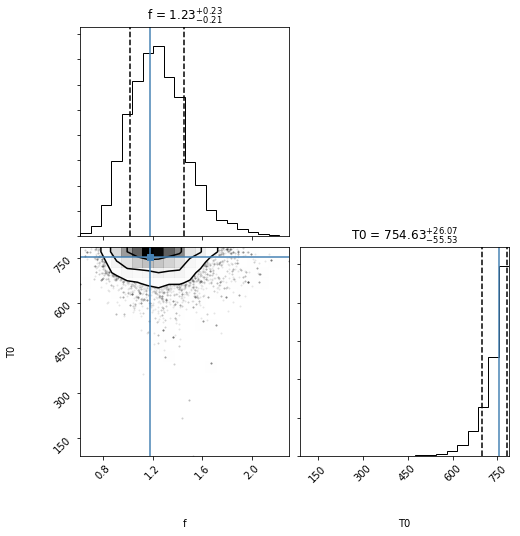

In [56]:
choose = np.arange(0,7000,10) # note the steps of 10 now
ndim, nwalkers = 2, 10 # now 2D problem!
pos = [np.array([1e-7,500]) + np.array([1e-8,10])*np.random.rand(ndim) for i in range(nwalkers)]
# note that the sampler now uses a different likelihood function
# i.e. the one which also fits the explosion time, for which reason it is omitted in call to args
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike2, args=(tt[choose], count_data[choose], tau_d))
sampler.reset()
pos, prob, state  = sampler.run_mcmc(pos, 2000, progress=True)

samples = sampler.get_chain() # extract the 2000 sampled values for each chain
samplesf = sampler.flatchain  # flatten that array to only have a 1D array with 20000 values
# instead of 2D array with 2000 times 10 values, like the samples array
print(samples.shape)

#let's plot the results
burnin = 1000
fig = corner.corner(samplesf[burnin*nwalkers:,:]*[1e7,1], quantiles=[0.16,0.84],show_titles=True,
                    truths=[F_norm*1e7,T00], labels=['f','T0'])
# note that now we have a 2D problem and thus a real 'corner plot'
# this means we just rescale the flux samples by 1e7 and the time by 1
# the flux normalisation is still found, and T0 seems to be bounded to a value below 780?
fig.set_size_inches(8,8)

<h3>Let's plot this in the model space to see what's actually happening:</h3>

In [57]:
t_model = np.arange(0,7000,10) # define model times to plot (here only every tenth time bin for illustration)

y_models = np.zeros((len(t_model),samplesf.shape[0])) # define a 2D array with dimensions n_times x n_samples 

# fill the y_models array and calculate the model for each sample
for i in range(samplesf.shape[0]):
    y_models[:,i] = samplesf[i,0]*exp_decay_hard(t_model,samplesf[i,1],tau_d) * T_exp * A_eff
# not that in the last line the T0 is now changed to sampled values

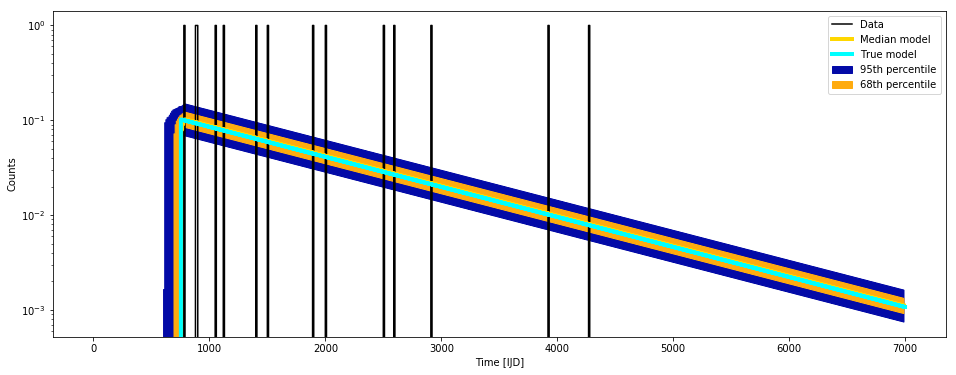

In [58]:
plt.figure(figsize=(16,6))

plt.step(tt[choose],count_data[choose],color='black',label='Data') # data 

# 2sigma band
level = 95.4
plt.fill_between(t_model,
                np.percentile(y_models[:,burnin*nwalkers:], 50 - 0.5*level, axis=1 ),
                np.percentile(y_models[:,burnin*nwalkers:], 50 + 0.5*level, axis=1 ),
                color='xkcd:cobalt blue',alpha=1.0,step='mid',label='95th percentile')

# 1sigma band
level = 68.3
plt.fill_between(t_model,
                np.percentile(y_models[:,burnin*nwalkers:], 50 - 0.5*level, axis=1 ),
                np.percentile(y_models[:,burnin*nwalkers:], 50 + 0.5*level, axis=1 ),
                color='xkcd:yellowish orange',alpha=1,step='mid',label='68th percentile')

# median model
fit_model = np.median(y_models[:,burnin*nwalkers:],axis=1)
plt.step(t_model,fit_model,linewidth=4,color='gold',where='mid',label='Median model')

plt.xlabel('Time [IJD]')
plt.ylabel('Counts')

plt.yscale('log')
plt.step(tt,flux*T_exp*A_eff,color='cyan',linewidth=4,where='mid',label='True model')

plt.title('')
plt.legend()

<h3>Aha! Given the design of the problem (only the source), the time at which the first photon is observed is the latest possible explosion date (if there was no explosion, there are also no photons). However, given the decay time, the explosion date is somewhat uncertain (100 days).<br>
    Still, the fit is good, and we get what we expected<br>
    With 14 photons.</h3>

<h3>Now, let's have a closer look at the INTEGRAL data set:<br>
    First, we check out how to deal with FITS files, and extract and visualise their contents></h3>

<h3>If we know what's the content of a file, we don't have to the following steps. Also, we need to close the file after we opened it and extracted the content we want:</h3>

In [59]:
poin = fits.open('pointing_filter.fits.gz') # openening the file

In [60]:
poin.info() # what extensions are included in the file

Filename: pointing_filter.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPI.-OBS.-PNT    1 BinTableHDU     45   99880R x 11C   [8A, 15A, 4I, 4I, D, D, D, E, E, E, E]   


In [61]:
poin['SPI.-OBS.-PNT'].columns # a call to one extension is similar to accessing a dictionary
# the .column method shows the contents and the formats

ColDefs(
    name = 'PTID_ISOC'; format = '8A'
    name = 'PTID_SPI'; format = '15A'
    name = 'OBT_START'; format = '4I'; bzero = 32768
    name = 'OBT_END'; format = '4I'; bzero = 32768
    name = 'TSTART'; format = 'D'
    name = 'TSTOP'; format = 'D'
    name = 'TELAPSE'; format = 'D'
    name = 'RA_SPIX'; format = 'E'
    name = 'DEC_SPIX'; format = 'E'
    name = 'RA_SPIZ'; format = 'E'
    name = 'DEC_SPIZ'; format = 'E'
)

<h3>Now, we extract the pointing direction of our instrument. For some reason, the optical axis (where the instrument pointed to) is X. This is very unusual, as typically it is set to Z...<br>
    Instead of using 'SPI.-OBS.-PNT', we can also use just the index of the extension: 1</h3>

In [62]:
ra_spi = poin[1].data['RA_SPIX']
dec_spi = poin[1].data['DEC_SPIX']

<h3>And plotting the right ascension and declination points of our observations:</h3>

Text(0, 0.5, 'DEC [deg]')

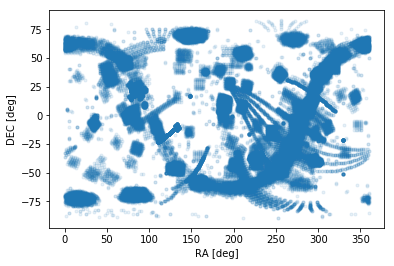

In [63]:
plt.plot(ra_spi,dec_spi,'.',alpha=0.1)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

<h3>From what we are used to, we can somewhat see the galactic plane as the S-shaped band here. Let's convert to galactic coordinates using the astropy.coordinates package:</h3>

In [64]:
from astropy.coordinates import SkyCoord

In [65]:
poin_coords = SkyCoord(ra=ra_spi,
                       dec=dec_spi,
                       unit='deg')
# this creates an object which holds RA and DEC values in units of degrees

<h3>To convert the coordinates, and extracting them to arrays, we use the "galactic" method to con ert from RA/DEC to GL/GB coordinates:</h3>

In [66]:
lon_spi = poin_coords.galactic.l.value
lon_spi[lon_spi>180]-=360 # again shifting the coordiantes to -180 to +180 deg
lat_spi = poin_coords.galactic.b.value

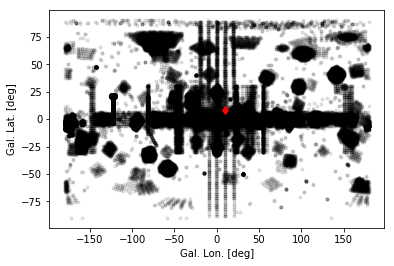

In [67]:
plt.plot(lon_spi,lat_spi,'k.',alpha=0.1)
plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')
plt.plot(lon[idx],lat[idx],color='red',marker='d') # this plots the position of one of our objects with index idx (=100)

<h3>After this, we want to know how long our objects had been observed.<br>
    This means we need to check if an object is inside the field of view of our instrument (16 deg), and when it observed the source after the explosion date (because before it didn't exist).</h3>

In [72]:
telapse = poin[1].data['TELAPSE'] # elapsed time at each pointing position in units of seconds
tstart = poin[1].data['TSTART'] # starting time of the observation in IJD
tstop = poin[1].data['TSTOP'] # stopping time of the observation in IJD
# elapse = tstop-tstart

In [69]:
from angular_distance import * # this reads in the angular distance function
# we use this si check if a source is inside the FoV

In [70]:
T00_arr = data_frame['IJD'].values[good_novae] # Array of explosion dates in IJD

<h3>Now, what is the angular distance of one of our objects to each and every pointing?</h3>

In [74]:
idx = 50
adist = angular_distance(lon[idx],lat[idx],lon_spi,lat_spi)

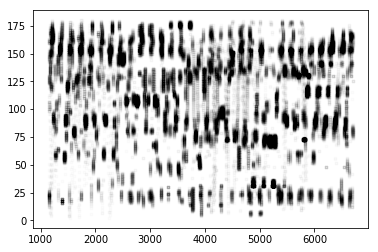

In [82]:
plt.plot(tstart,adist,'k.',alpha=0.01) # plot of visibility of our source wrt time

<h3>Which values do we need?</h3>

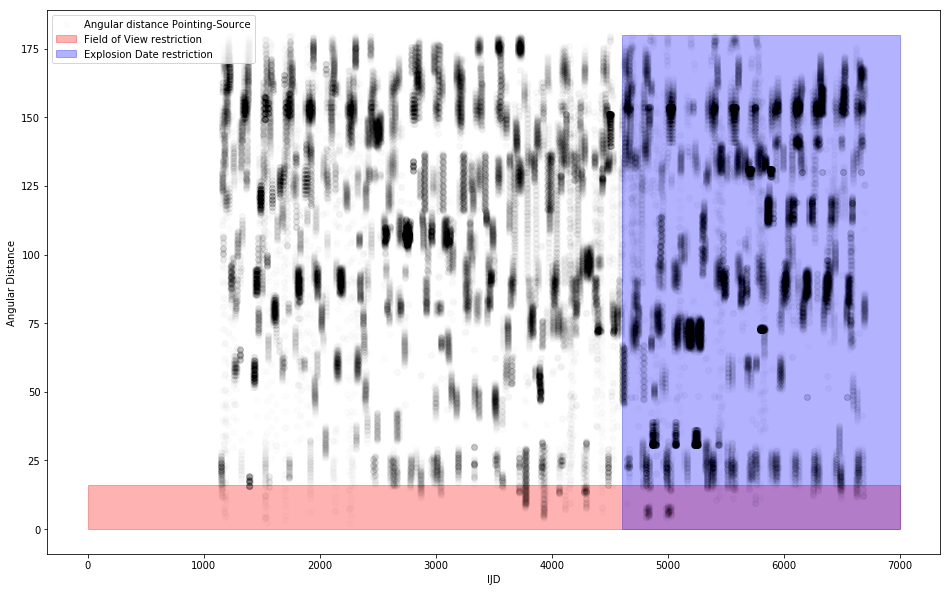

In [94]:
plt.figure(figsize=(16,10))
plt.plot(tstart,adist,'ko',alpha=0.01,label='Angular distance Pointing-Source')
plt.xlabel('IJD')
plt.ylabel('Angular Distance')

plt.fill([0,7000,7000,0,0],
         [16,16,0,0,16],color='red',alpha=0.3,label='Field of View restriction')
plt.fill([T00_arr[idx],7000,7000,T00_arr[idx],T00_arr[idx]],
         [180,180,0,0,180],color='blue',alpha=0.3,label='Explosion Date restriction')
plt.legend(loc=2)

<h3>Clearly, there is an overlap region which we need to extract:</h3>

In [95]:
on_time_arr = np.zeros(len(T00_arr)) # array of observation times, initialised as zero for all objects
for idx in range(len(T00_arr)): # loop over all objects
    adist = angular_distance(lon[idx],lat[idx],lon_spi,lat_spi) # angular distance array for object with index idx
    selection = np.where((adist <= 16) &              # where is the source inside the FoV
                         (tstart >= T00_arr[idx]))[0] # when is the source already exploded
    on_time_arr[idx] = np.sum(telapse[selection])/1e6 # in units of Ms (megaseconds)

Text(0, 0.5, 'Observation time [Ms]')

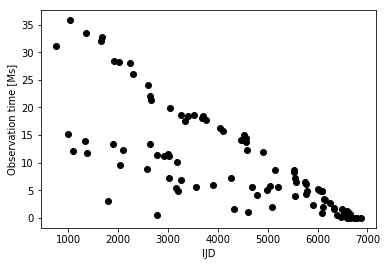

In [99]:
plt.plot(T00_arr,on_time_arr,'ko')
plt.xlabel('IJD')
plt.ylabel('Observation time [Ms]')

<h3>There seem to be two distinct 'populations' of objects: the steeper one is supposedly the one from the galactic centre since most of them happened to occur there. The other one is representing the objects from the galactic disk.<br>
    In principle, we could figure out what is the observation(!) rate in bulge and disk independently. However, here we stick to the total number, and check out the observation(!) rate of novae. (This is NOT the nova rate, but only the rate of observed objects)</h3>

<h3>We 'bin' the number of observed novae into bins of one year.<br>
    This can be done by running a loop over the bins...<br>
    Or by using a histogram function></h3>

In [100]:
n_per_year = []
year_bins = np.arange(0,20*365,365)
for i in range(len(year_bins)-1):
    n_per_year.append(len(np.where((T00_arr >= year_bins[i]) & (T00_arr <= year_bins[i+1]))[0]))
n_per_year = np.array(n_per_year)

Text(0, 0.5, '#Novae per year')

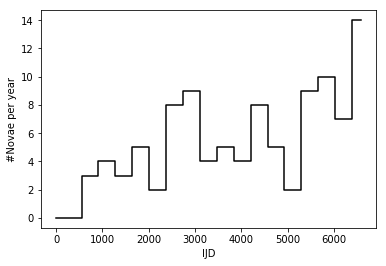

In [106]:
plt.step(year_bins[0:-1],n_per_year,where='mid',color='black')
# there are one more boundaries for the years than years, so that we use the range between 0 and -1
# (i.e. the last entry is excluded)
plt.xlabel('IJD')
plt.ylabel('#Novae per year')

In [113]:
obs_rate = np.mean(n_per_year[2:]) # average observation rate per year
print(obs_rate)

6.0


<h3>As mentioned, the alternative is using the matplotlib.hist or numpy.histogram function:</h3>

(array([ 0.,  0.,  3.,  4.,  3.,  5.,  2.,  8.,  9.,  4.,  5.,  4.,  8.,
         5.,  2.,  9., 10.,  7., 14.]),
 array([   0,  365,  730, 1095, 1460, 1825, 2190, 2555, 2920, 3285, 3650,
        4015, 4380, 4745, 5110, 5475, 5840, 6205, 6570, 6935]),
 <a list of 19 Patch objects>)

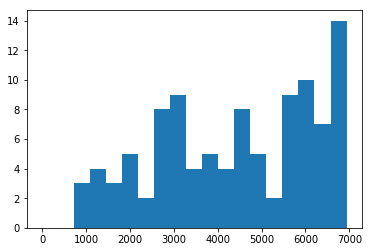

In [108]:
plt.hist(T00_arr,bins=year_bins)

<h3>As a reminder, for the bulge and disk thing from above, here a plot to compare the observations (black dots) and the positions of our objects (yellow stars), weighted with the observation times:</h3>

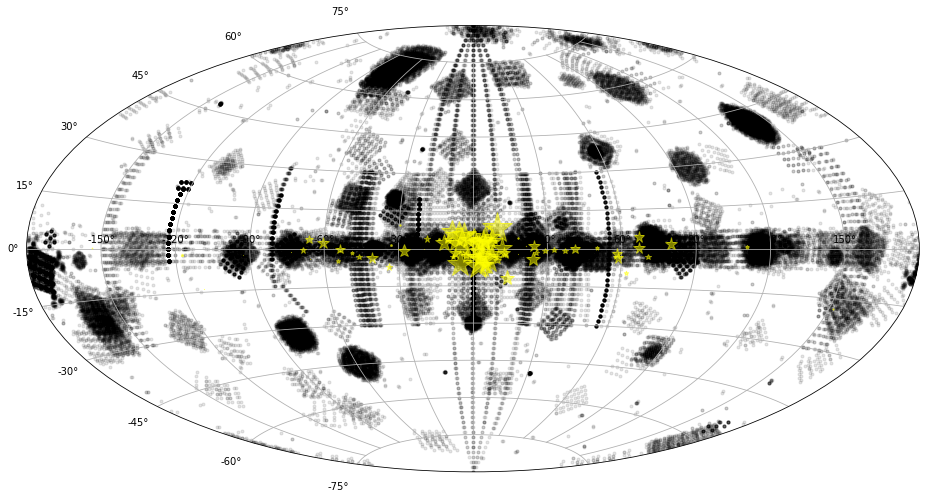

In [110]:
plt.figure(figsize=(16,10))
plt.subplot(projection='aitoff')
plt.scatter(np.deg2rad(lon_spi),np.deg2rad(lat_spi),color='black',marker='.',alpha=0.1)
for idx in range(len(T00_arr)):
    plt.plot(np.deg2rad(lon[idx]),np.deg2rad(lat[idx]),
             color='yellow',marker='*',markersize=on_time_arr[idx],alpha=0.5)
plt.grid(True)

<h3>Okay, now a little recap of how to fit Poisson-distributed data, here with the occurance rate of novae per year:<br>
    For this, we define a constant rate model and a linearly increasing rate model to check if the rate really does increase</h3>

In [111]:
def constant_rate(theta, t, data):
    
    r = theta # parametes to be fitted
    
    model = r * np.ones(len(t)) # our model in count space(!), i.e. expected number
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

In [112]:
def rising_rate(theta, t, data):
    
    r, s = theta # parametes to be fitted
    
    model = r + s*t # our model in count space(!), i.e. expected number, linearly increasing
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

In [114]:
ndim, nwalkers = 1, 10
pos = [np.array([obs_rate]) + 2*np.random.rand(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, constant_rate,
                                args=(np.arange(len(n_per_year))[2:],n_per_year[2:]))
# here we omit the first 2 years, since the INTEGRAL mission started in 2002.
sampler.reset()
pos, prob, state  = sampler.run_mcmc(pos, 2000, progress=True)

100%|██████████| 2000/2000 [00:01<00:00, 1320.13it/s]


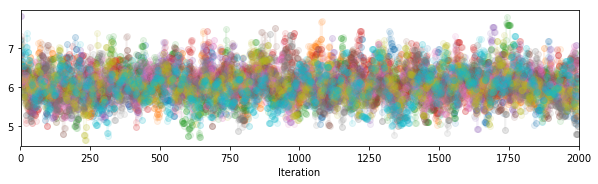

In [115]:
samples = sampler.get_chain()
samplesf = sampler.flatchain
samples.shape

fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)
samples = sampler.get_chain()
for i in range(ndim):
    if ndim == 1:
        ax = axes
        ax.set_xlabel("Iteration");
    else:
        ax = axes[i]
        axes[-1].set_xlabel("Iteration");
    ax.plot(np.arange(len(samples)),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

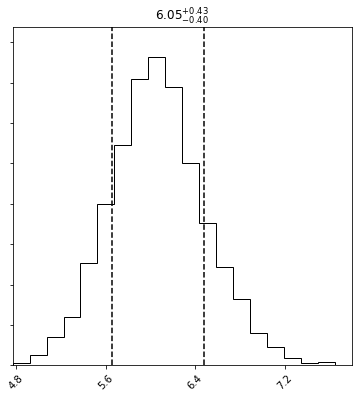

In [117]:
burnin = 1000
fig = corner.corner(samplesf[burnin*nwalkers:,:], quantiles=[0.16,0.84],show_titles=True)
fig.set_size_inches(8,8)

<h3>Great, the answer is 6, as expected. Now, we also have uncertainties, which is NOT given by sqrt(6) but by the model, given the data (maximum likelihood fit)<br>
BTW: what is the maximum likelihood here?</h3>

161.51893172205507


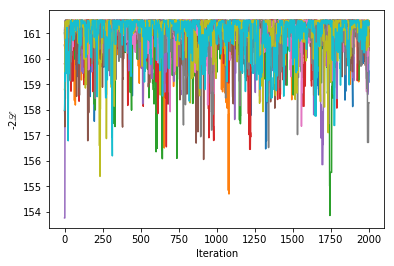

In [121]:
plt.plot(sampler.lnprobability);
plt.xlabel('Iteration')
plt.ylabel(r'-2$\mathscr{L}$')
loglik_max_const = sampler.lnprobability.max()
print(loglik_max_const)

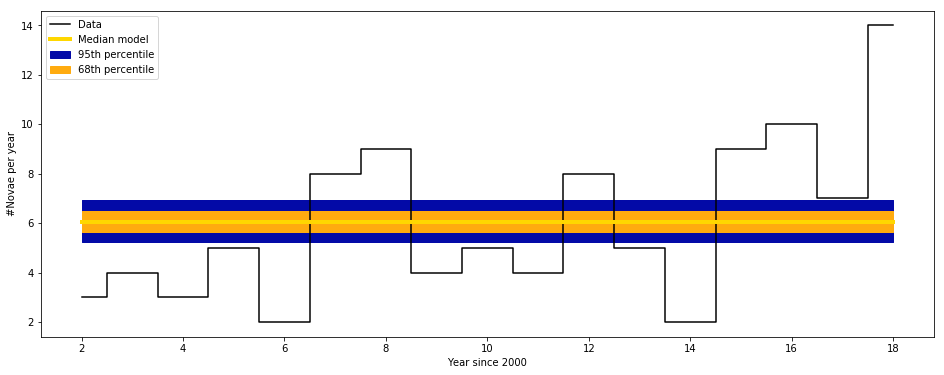

In [128]:
t_model = np.arange(len(n_per_year))[2:]

y_models = np.zeros((len(t_model),samplesf.shape[0]))

for i in range(samplesf.shape[0]):
    y_models[:,i] = samplesf[i,0]*np.ones(len(t_model))
    
y_pcc = np.random.poisson(y_models)

plt.figure(figsize=(16,6))

plt.step(np.arange(len(n_per_year))[2:],n_per_year[2:],color='black',label='Data',where='mid')

level = 95.4
plt.fill_between(t_model,
                np.percentile(y_models, 50 - 0.5*level, axis=1 ),
                np.percentile(y_models, 50 + 0.5*level, axis=1 ),
                color='xkcd:cobalt blue',alpha=1.0,step='mid',label='95th percentile')

level = 68.3
plt.fill_between(t_model,
                np.percentile(y_models, 50 - 0.5*level, axis=1 ),
                np.percentile(y_models, 50 + 0.5*level, axis=1 ),
                color='xkcd:yellowish orange',alpha=1,step='mid',label='68th percentile')

fit_model = np.median(y_models,axis=1)
plt.step(t_model,fit_model,linewidth=4,color='gold',where='mid',label='Median model')

plt.xlabel('Year since 2000')
plt.ylabel('#Novae per year')

plt.title('')
plt.legend()


<h3>Is that actually a good fit?<br>
    We'll check by sampling new data from our predicted model parameter distributions, and compare to the data.<br>
    This is called a 'predictive check', and would show us if there are any problems in our model:</h3>

In [123]:
y_ppc = np.random.poisson(y_models) # predictive check

In [124]:
y_ppc.shape

(17, 20000)

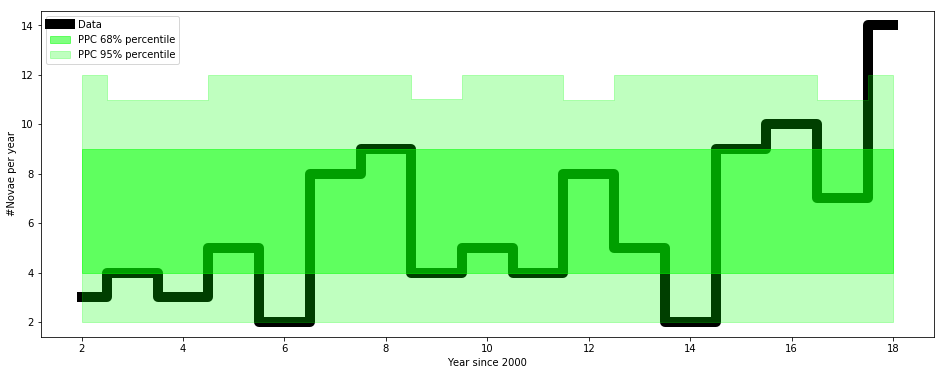

In [127]:
plt.figure(figsize=(16,6))
plt.step(np.arange(len(n_per_year))[2:],n_per_year[2:],
         color='black',label='Data',zorder=-1000,linewidth=10,where='mid')
plt.fill_between(t_model,
                 np.percentile(y_pcc,50+68.3/2,axis=1),
                 np.percentile(y_pcc,50-68.3/2,axis=1),
                 color='lime',alpha=0.5,step='mid',label='PPC 68% percentile')
plt.fill_between(t_model,
                 np.percentile(y_pcc,50+95.4/2,axis=1),
                 np.percentile(y_pcc,50-95.4/2,axis=1),
                 color='lime',alpha=0.25,step='mid',label='PPC 95% percentile')
plt.xlabel('Year since 2000')
plt.ylabel('#Novae per year')
plt.legend()

<h3>Seems like the model captures all the variance except for the last year.<br>
    Maybe the observation rate is in fact rising? (This could be expected since the instrumentation of optical telescopes is getting better, especially on a time scale of 20 years)</h3>

In [129]:
ndim, nwalkers = 2, 10
pos = [np.array([obs_rate,0.2]) + 2*np.random.rand(ndim) for i in range(nwalkers)]
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, rising_rate,
                                 args=(np.arange(len(n_per_year))[2:],n_per_year[2:]))

sampler2.reset()
pos, prob, state  = sampler2.run_mcmc(pos, 2000, progress=True)

100%|██████████| 2000/2000 [00:01<00:00, 1285.67it/s]


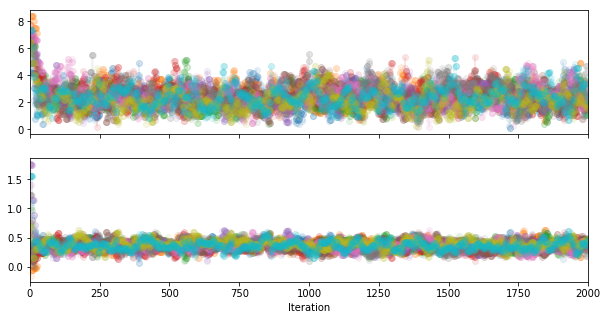

In [130]:
samples2 = sampler2.get_chain()
samples2f = sampler2.flatchain
samples2.shape

fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)
samples2 = sampler2.get_chain()
for i in range(ndim):
    if ndim == 1:
        ax = axes
        ax.set_xlabel("Iteration");
    else:
        ax = axes[i]
        axes[-1].set_xlabel("Iteration");
    ax.plot(np.arange(len(samples2)),samples2[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, len(samples2))
    ax.yaxis.set_label_coords(-0.1, 0.5)

<h3>Looks(!) like a significant effect. Let's check the likelihoof ratio:</h3>

In [133]:
loglik_max_linear = sampler2.lnprobability.max()   # extracting the max likelihood from the fit
print(loglik_max_linear,loglik_max_const)          # max values for linear and const model
print(loglik_max_linear-loglik_max_const)          # likelihood ratio test 
print(np.sqrt(loglik_max_linear-loglik_max_const)) # "significance" of additional component

171.4814599026071 161.51893172205507
9.962528180552027
3.1563472845287524


<h3>Well, now we got a "3.2sigma" result. In Physics, people would mere have a look. In Astrophysics, it's worth a prize.</h3>

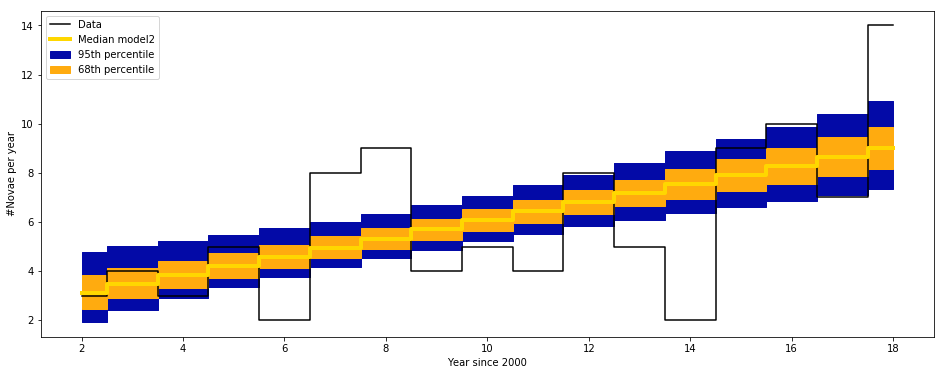

In [135]:
t_model2 = np.arange(len(n_per_year))[2:]
y_model2s = np.zeros((len(t_model2),samples2f.shape[0]))
for i in range(samples2f.shape[0]):
    y_model2s[:,i] = samples2f[i,0] + samples2f[i,1]*t_model2
plt.figure(figsize=(16,6))
plt.step(np.arange(len(n_per_year))[2:],n_per_year[2:],color='black',label='Data',where='mid')
level = 95.4
plt.fill_between(t_model2,
                np.percentile(y_model2s, 50 - 0.5*level, axis=1 ),
                np.percentile(y_model2s, 50 + 0.5*level, axis=1 ),
                color='xkcd:cobalt blue',alpha=1.0,step='mid',label='95th percentile')
level = 68.3
plt.fill_between(t_model2,
                np.percentile(y_model2s, 50 - 0.5*level, axis=1 ),
                np.percentile(y_model2s, 50 + 0.5*level, axis=1 ),
                color='xkcd:yellowish orange',alpha=1,step='mid',label='68th percentile')
fit_model2 = np.median(y_model2s,axis=1)
plt.step(t_model2,fit_model2,linewidth=4,color='gold',where='mid',label='Median model2')
plt.xlabel('Year since 2000')
plt.ylabel('#Novae per year')
plt.title('')
plt.legend()

<h3>Okay, clearly, our model now predicts a rising rate. What about the predictive check?</h3>

In [136]:
y_ppc2 = np.random.poisson(y_model2s)

Text(0, 0.5, '#Novae per year')

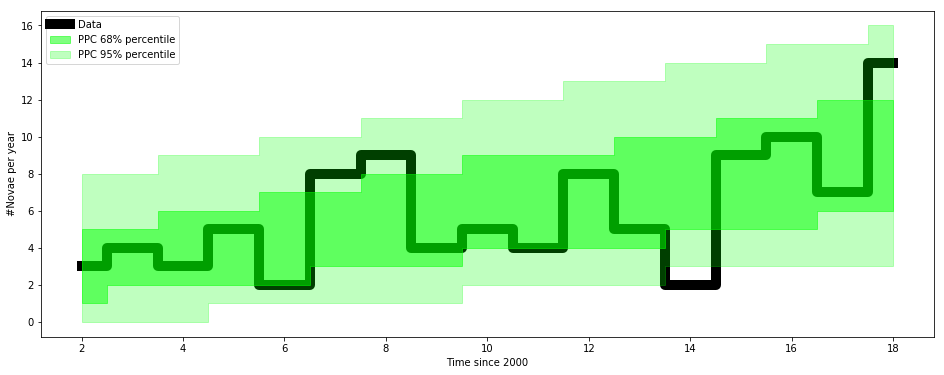

In [138]:
plt.figure(figsize=(16,6))
plt.step(np.arange(len(n_per_year))[2:],n_per_year[2:],
         color='black',label='Data',zorder=-1000,linewidth=10,where='mid')
plt.fill_between(t_model2,
                 np.percentile(y_ppc2,50+68.3/2,axis=1),
                 np.percentile(y_ppc2,50-68.3/2,axis=1),
                 color='lime',alpha=0.5,step='mid',label='PPC 68% percentile')
plt.fill_between(t_model2,
                 np.percentile(y_ppc2,50+95.4/2,axis=1),
                 np.percentile(y_ppc2,50-95.4/2,axis=1),
                 color='lime',alpha=0.25,step='mid',label='PPC 95% percentile')
plt.legend()
plt.xlabel('Time since 2000')
plt.ylabel('#Novae per year')

<h3>Now we capture the variance in the year 2018, however miss the point in 2014.<br>
    That's the crux with a 3sigma result: it's only 3sigma.</h3>

<h3>Let's return to our data set and catalogue, and check what we expect from only the 102 objects we chose:</h3>

In [142]:
d0_arr = dist.values[good_novae]*u.kpc # distance to novae (in units of kpc)
d0_arr_err = dist_err.values[good_novae]*u.kpc # uncertainties to nova (also in kpc)

F_norm_arr = L022 / (4*np.pi*d0_arr**2) # calculation of maximum flux (i.e. at t = T0)
# note that L022 is SET to a certain value which we decided in the first place
# our goal will be to find out what L022 (and Mej22) actually is

F_norm_arr = F_norm_arr.to(1/(u.cm**2*u.s)).value
# conversion to useful flux units (ph/cm2/s) and only return the value

# gaussian propagation of uncertainties for the flux values
F_norm_arr_err = 2*F_norm_arr*d0_arr_err/d0_arr
F_norm_arr_err = F_norm_arr_err.value

Text(0.5, 0, 'Time [IJD]')

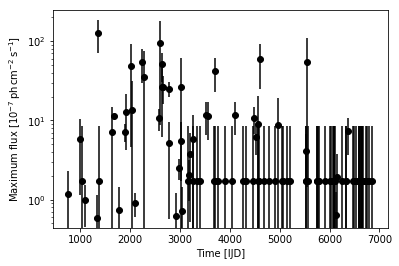

In [150]:
plt.errorbar(T00_arr,F_norm_arr*1e7,yerr=F_norm_arr_err*1e7,marker='o',linestyle='',color='black')
plt.ylabel(r'Maximum flux [$10^{-7}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]')
plt.yscale('log')
plt.xlabel('Time [IJD]')

<h3>We see that for more objects, we expect something like 1e-7 for the flux, and (due to the large uncertainties in the distance) 'consistent with zero'. However, this is a false argument, as the propagation of uncertainties is just doing a first-order expansion the distance is definitely never closer than 1 kpc [as otherwise, INTEGRAL would have seen it, and we would be done with the project].</h3>

<h3>What are the prections now for:<br>
    1) Each individual object<br>
    2) The population of 102 objects in our data set?</h3>

<h3>Here, we define a 2D array with dimensions of n_times x n_objects, i.e. 7000 x 102, for both, the values themselves then we expect, and some sort of uncertainty that we estimate from the distance:</h3>

In [151]:
flux_arr_time = np.zeros((len(tt),len(T00_arr)))
flux_arr_time_err = np.zeros((len(tt),len(T00_arr)))
for idx in range(len(T00_arr)):
    flux_arr_time[:,idx] = F_norm_arr[idx]*exp_decay_hard(tt,T00_arr[idx],tau_d)
    flux_arr_time_err[:,idx] = F_norm_arr_err[idx]*exp_decay_hard(tt,T00_arr[idx],tau_d)

<h3>And a plot for each individual object (black), and the total flux of all objects (red):</h3>

Text(0, 0.5, 'Flux [$\\mathrm{ph\\,cm^{-2}\\,s^{-1}}$]')

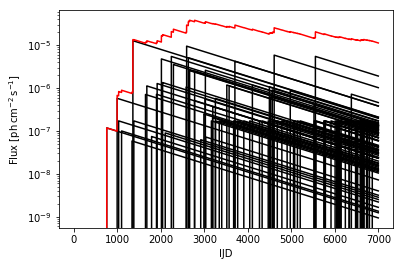

In [156]:
for i in range(len(T00_arr)):
    plt.plot(tt,flux_arr_time[:,i],color='black')
plt.plot(tt,np.sum(flux_arr_time,axis=1),color='red')
plt.yscale('log')
plt.xlabel('IJD')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}}$]')

<h3>What to these plots with uncertainties look like?</h3>

Text(0, 0.5, 'Flux [$\\mathrm{ph\\,cm^{-2}\\,s^{-1}}$]')

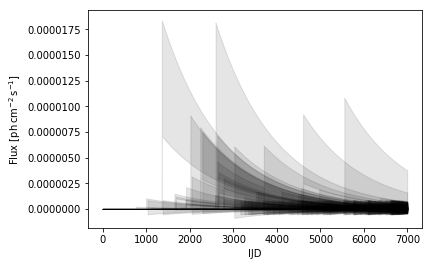

In [163]:
for i in range(len(T00_arr)):
    plt.fill_between(tt,
                     flux_arr_time[:,i]-flux_arr_time_err[:,i],
                     flux_arr_time[:,i]+flux_arr_time_err[:,i],
                     color='black',alpha=0.1)
#plt.plot(tt,np.sum(flux_arr_time,axis=1),color='red')
#plt.yscale('log')
plt.xlabel('IJD')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}}$]')

<h3>Note that there also unphysical expectations included, i.e. here with negative fluxes...</h3>

<h3>And finally a plot showing the total flux with 1 and 2 sigma error bands:</h3>

In [164]:
flux_tot_arr = np.sum(flux_arr_time,axis=1) # sum over the individual objects (axis = 1)
flux_tot_arr_err = np.sqrt(np.sum(flux_arr_time_err**2,axis=1)) # standard propagation of uncertainties
# summing again over all objects for all times

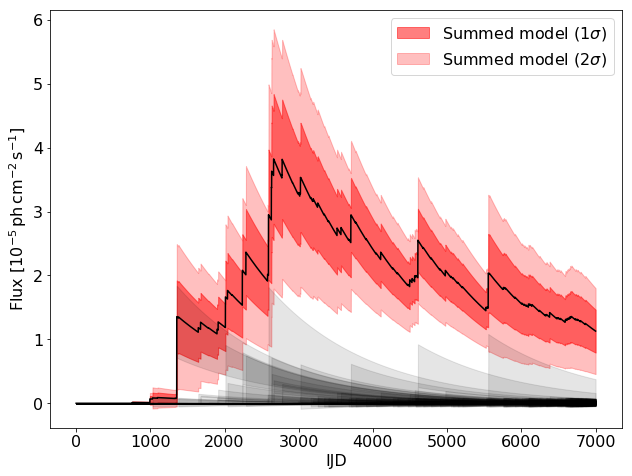

In [175]:
plt.figure(figsize=(10.24,7.68))
plt.fill_between(tt,
                 (flux_tot_arr+flux_tot_arr_err)*1e5, # 1sigma up
                 (flux_tot_arr-flux_tot_arr_err)*1e5, # 1sigma down
                 color='red',alpha=0.5,label=r'Summed model ($1\sigma$)')
plt.fill_between(tt,
                 (flux_tot_arr+2*flux_tot_arr_err)*1e5, # 2sigma up
                 (flux_tot_arr-2*flux_tot_arr_err)*1e5, # 2sigma down
                 color='red',alpha=0.25,label=r'Summed model ($2\sigma$)')
# note that the 1 and 2 sigma uncertainties as defined by merely a factor 2 is a very rough estimate
# and probably most of the time wrong
plt.plot(tt,flux_tot_arr*1e5,color='black')
# I scaled all fluxes by 1e5 for illustration purpose

for i in range(len(T00_arr)):
    plt.fill_between(tt,
                     (flux_arr_time[:,i]-flux_arr_time_err[:,i])*1e5,
                     (flux_arr_time[:,i]+flux_arr_time_err[:,i])*1e5,
                     color='black',alpha=0.1)

plt.xlabel('IJD',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'Flux [$10^{-5}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]',fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

<h3>These are the ones for which we know that they actually had happened and which INTEGRAL observed for some amount of time. For the sake of completeness, let us sample the "whole" population and plot that as a function of time:</h3>

<h3>Before doing that, consider the memory size that you need ... (see below):</h3>

In [259]:
R_N = 50 # expeted nova rate in the Milky Way (also carries uncertainties)
R_N_err = 27 # these values coem from Shafter 2017
# https://iopscience.iop.org/article/10.3847/1538-4357/834/2/196/meta


yd = 365.25 # year in days
nr = yd/R_N # average days to next nova
nr_err = yd*R_N_err/R_N**2 # uncertainty in the previous value
print("Average days between two events: %4.2f+-%4.2f" % (nr,nr_err))
# number of novae to sample during 17 INTEGRAL years
n_yr = 30 # years to sample
# here we choose 30 years; recall that the half-life time of our isotope of interest (22Na)
# is 2.75 yrs, so that we have more than 10 half-life times sampled and the "first" nova shows less than 0.1%
# of its initial flux: 2**(-30/2.75)
NN = int(yd*n_yr/nr)
print("Number of novae sampled: ",NN)


# since we are incorporate all the uncertainties in our samples, we will run 1000 times
# the same code to get a measure of our scatter:
np.random.seed()

# how often to run the model
N_samples = 1000
# where to evaluate the model
N_model = 1000
# times at which to evaluate
t_model = np.linspace(-100,12000,N_model)

# array to include all samples
flux_arr_time_pop = np.zeros((N_model,NN,N_samples))

for s in tqdm(range(N_samples)):
    # same thing 1000 times to get a range of scatter over time

    # distance to galactic centre
    s0 = 8.178
    # distanc distribution on an exponential disk can be approximated by triangle function
    d_mu_kpc = np.random.triangular(0,8.5,25,NN)
    d_mu_kpc[d_mu_kpc < 1.5] = 1.5 # limiting samples to only "distant" novae beyond 1.5 kpc
    d_si_kpc = d_mu_kpc * 0.3 # distances typically "known" only to 20-40% accuracy or less
    d_mu_kpc = d_mu_kpc + np.random.randn(NN)*d_si_kpc # true distance is obscured by this uncertainty

    # sampling optimal occurrence times (with distribution in times)
    #T0_mu_d = np.arange(0,nr*NN,nr) # this would fixed times, but a rate does not mean equi-distant time intervals
    T0_si_d = np.ones(NN)*nr_err # scatter around the true times 
    T0_mu_d = np.arange(0,nr*NN,nr) + T0_si_d # thus, we sample with an uncertainty according to
    # the uncertainty of the waiting time (actually this should be Poisson, but we'll keep it simply for the moment)
    

    #priors on array of parameters for all NN novae
    # every nova on average 1e-9 mass of 22Na with some scatter
    # that that scatter is actually unknown, but we assume the following range here
    # note that this is logarithmic!!!
    logM_lo_Msun = -11
    logM_hi_Msun = -7
    Mej_mu_Msol = (10**(np.random.rand(NN)*(logM_hi_Msun-logM_lo_Msun)+logM_lo_Msun))*u.Msun
    # and finally the flux normalisations of all our objects:
    L022_pop = Mej_mu_Msol*p22/(m22*tau22)
    F_norm_mu_phcm2s = (L022_pop / (4*np.pi*(d_mu_kpc*u.kpc)**2)).to(1/(u.cm**2*u.s)).value

    # and loop over all objects to be sampled to get fluxes
    for idx in range(NN):
        flux_arr_time_pop[:,idx,s] = F_norm_mu_phcm2s[idx]*exp_decay_hard(t_model,T0_mu_d[idx],tau_d)

Average days between two events: 7.30+-3.94
Number of novae sampled:  1500


In [267]:
print("%d GigaBytes" % (flux_arr_time_pop.size * flux_arr_time_pop.itemsize / 1024**3))

11 GigaBytes


<h3>Took about 2 minutes and requires 11 GB of RAM, consider reducing the number of samples to be drawn to N_samples = 100 or similar.</h3>

In [288]:
flux_arr_time_pop_tot = np.sum(flux_arr_time_pop,axis=1) # sum over all objects as before

In [270]:
flux_arr_time_pop_tot.shape

(1000, 1000)

(1e-05, 0.01)

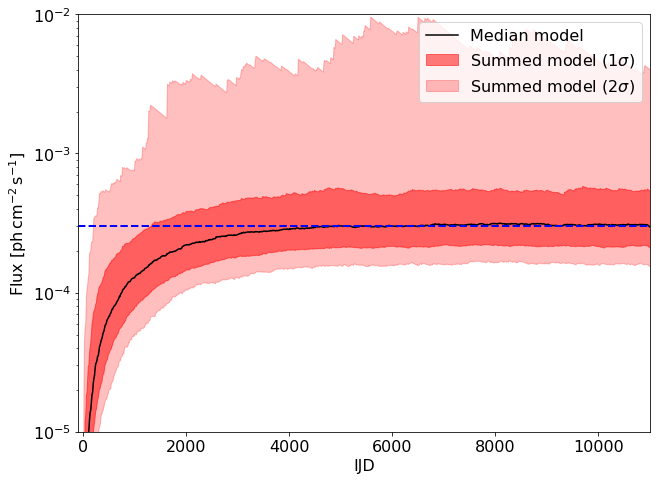

In [287]:
plt.figure(figsize=(10.24,7.68))
plt.fill_between(t_model,
                 np.percentile(flux_arr_time_pop_tot,50-68.3/2,axis=1), # 1sigma up
                 np.percentile(flux_arr_time_pop_tot,50+68.3/2,axis=1), # 1sigma down
                 color='red',alpha=0.5,label=r'Summed model ($1\sigma$)')

plt.fill_between(t_model,
                 np.percentile(flux_arr_time_pop_tot,50-95.4/2,axis=1), # 1sigma up
                 np.percentile(flux_arr_time_pop_tot,50+95.4/2,axis=1), # 1sigma down
                 color='red',alpha=0.25,label=r'Summed model ($2\sigma$)')

plt.plot(t_model,np.percentile(flux_arr_time_pop_tot,50,axis=1),label='Median model',color='black')

plt.yscale('log')
plt.xlabel('IJD',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}}$]',fontsize=16)
plt.yticks(fontsize=16)

plt.axhline(3e-4,color='blue',linestyle='--',linewidth=2)

plt.legend(fontsize=16)

plt.xlim(-100,11000)
plt.ylim(1e-5,1e-2)

<h3>We see the same behaviour, just, of course, with a smoother general behaviour, ans also with a larger intrinsic scatter  (fluxes up to 1e-2 within 2sigma), which are probably unphysical. We don't know what is exactly true, and thus, we need to fit the INTEGRAL data in a coherent way!</h3>

(1e-05, 0.01)

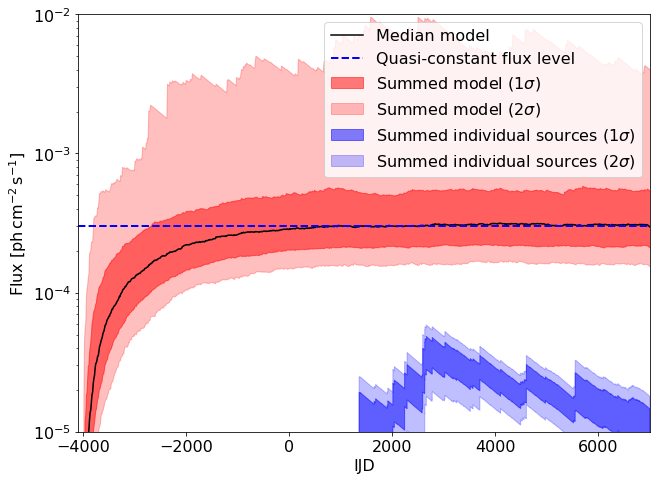

In [296]:
plt.figure(figsize=(10.24,7.68))
plt.fill_between(t_model-4000,
                 np.percentile(flux_arr_time_pop_tot,50-68.3/2,axis=1), # 1sigma up
                 np.percentile(flux_arr_time_pop_tot,50+68.3/2,axis=1), # 1sigma down
                 color='red',alpha=0.5,label=r'Summed model ($1\sigma$)')

plt.fill_between(t_model-4000,
                 np.percentile(flux_arr_time_pop_tot,50-95.4/2,axis=1), # 1sigma up
                 np.percentile(flux_arr_time_pop_tot,50+95.4/2,axis=1), # 1sigma down
                 color='red',alpha=0.25,label=r'Summed model ($2\sigma$)')

plt.plot(t_model-4000,np.percentile(flux_arr_time_pop_tot,50,axis=1),label='Median model',color='black')



plt.fill_between(tt,
                 (flux_tot_arr+flux_tot_arr_err), # 1sigma up
                 (flux_tot_arr-flux_tot_arr_err), # 1sigma down
                 color='blue',alpha=0.5,label=r'Summed individual sources ($1\sigma$)')
plt.fill_between(tt,
                 (flux_tot_arr+2*flux_tot_arr_err), # 2sigma up
                 (flux_tot_arr-2*flux_tot_arr_err), # 2sigma down
                 color='blue',alpha=0.25,label=r'Summed individual sources ($2\sigma$)')

plt.yscale('log')
plt.xlabel('IJD',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}}$]',fontsize=16)
plt.yticks(fontsize=16)

plt.axhline(3e-4,color='blue',linestyle='--',linewidth=2,label='Quasi-constant flux level')

plt.legend(fontsize=16)

plt.xlim(-100-4000,11000-4000)
plt.ylim(1e-5,1e-2)